In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics.pairwise import cosine_similarity

import os
import zipfile
import cv2
import shutil
import random
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

import sys
print("Python Version: ", sys.version)
print("Tensorflow Version: ", tf.__version__)

# DEFINED
BATCH_SIZE = 32
IMG_WIDTH  = 227
IMG_HEIGHT = 227

%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Python Version:  3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Tensorflow Version:  2.10.0


In [2]:
# Load model
model = keras.models.load_model("../TrainingModels/AlexNet.h5")

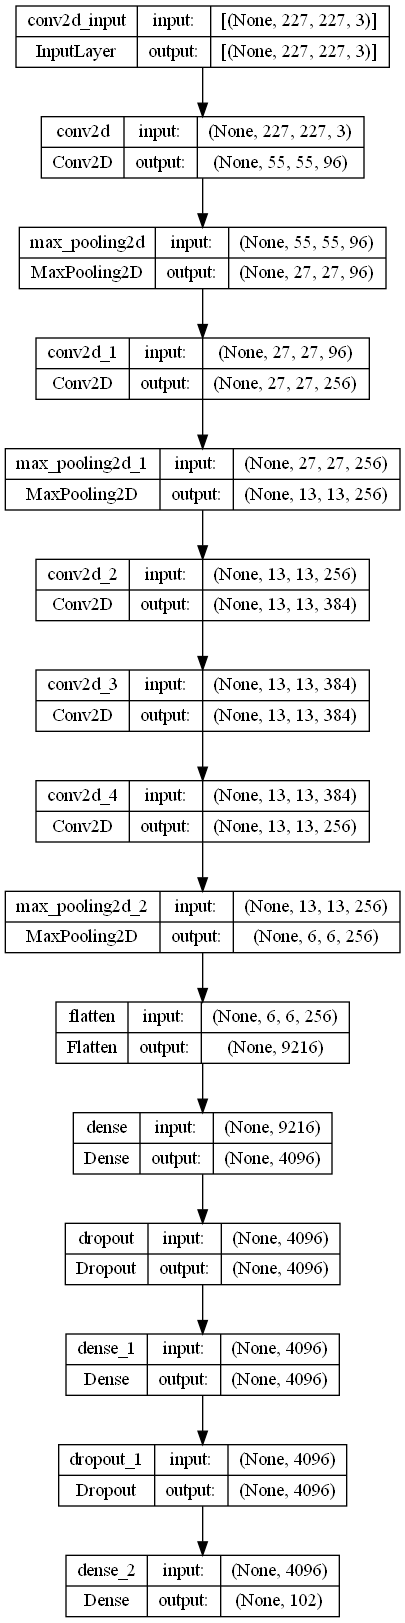

In [3]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [5]:
furniture_df = pd.read_csv("../furniture_data.csv")
shuffled_furniture_df = furniture_df.sample(frac=1).reset_index(drop=True)

shutil.copy(shuffled_furniture_df['Image_Path'].iloc[0], "../ImageTesting/largescale")

'../ImageTesting/largescale\\6989modern-armchairs-and-accent-chairs.jpg'

In [11]:
shuffled_furniture_df

,Furniture_Category,Furniture_Type,Image_Path
0,chairs,Modern,../Furniture_Data\chairs\Modern\6989modern-arm...
1,chairs,Transitional,../Furniture_Data\chairs\Transitional\23704tra...
2,tables,Contemporary,../Furniture_Data\tables\Contemporary\2532cont...
3,lamps,Modern,../Furniture_Data\lamps\Modern\5866modern-desk...
4,chairs,Modern,../Furniture_Data\chairs\Modern\6295modern-din...
...,...,...,...
90079,lamps,Traditional,../Furniture_Data\lamps\Traditional\13841tradi...
90080,sofas,Traditional,../Furniture_Data\sofas\Traditional\3159tradit...
90081,lamps,Contemporary,../Furniture_Data\lamps\Contemporary\4642conte...
90082,dressers,Transitional,../Furniture_Data\dressers\Transitional\6580tr...


In [7]:
furniture_df['Furniture_Category_Type'] = furniture_df['Furniture_Category'] + '-' + furniture_df['Furniture_Type']

furniture_df

,Furniture_Category,Furniture_Type,Image_Path,Furniture_Category_Type
0,beds,Asian,../Furniture_Data\beds\Asian\19726asian-daybed...,beds-Asian
1,beds,Asian,../Furniture_Data\beds\Asian\20027asian-canopy...,beds-Asian
2,beds,Asian,../Furniture_Data\beds\Asian\20109asian-panel-...,beds-Asian
3,beds,Asian,../Furniture_Data\beds\Asian\20508asian-platfo...,beds-Asian
4,beds,Asian,../Furniture_Data\beds\Asian\20750asian-comfor...,beds-Asian
...,...,...,...,...
90079,tables,Victorian,../Furniture_Data\tables\Victorian\5victorian-...,tables-Victorian
90080,tables,Victorian,../Furniture_Data\tables\Victorian\6victorian-...,tables-Victorian
90081,tables,Victorian,../Furniture_Data\tables\Victorian\7victorian-...,tables-Victorian
90082,tables,Victorian,../Furniture_Data\tables\Victorian\8victorian-...,tables-Victorian


C:\Users\user\Desktop\Workspace\Github\FurnitureClassificationRecommendation\ImageTesting\largescale\6989modern-armchairs-and-accent-chairs.jpg is a .jpg file


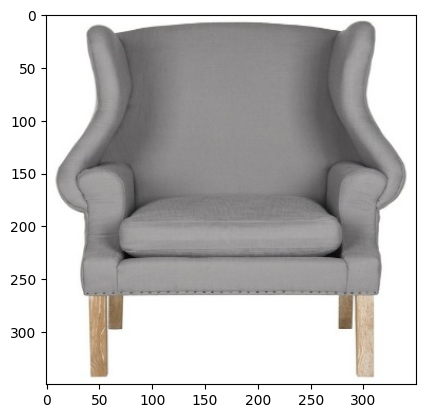

In [6]:
input_image_path = input("Please Input Your Image Location: ")
input_image_path.replace('\\', '/')

# Get the file extension from the file path
file_ext = os.path.splitext(input_image_path)[1]

# Check if the file extension is ".jpg"
if file_ext.lower() == ".jpg":
    correct_image_path = input_image_path
    plt.imshow(Image.open(input_image_path))
    print(f"{input_image_path} is a .jpg file")
else:
    print(f"{input_image_path} is not a .jpg file")

In [10]:
def prepare(filepath):
    img_array = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
    return np.expand_dims(new_array, axis=0).repeat(BATCH_SIZE, axis=0)

dataset_categories = furniture_df["Furniture_Category_Type"].unique()

# Predict input flower image
prediction = model.predict(prepare(correct_image_path))

predicted_class_index = np.argmax(prediction, axis=1)

# Get type of flower data with in the same from user flower input and reset index after getting all items
types_predict_dataset = furniture_df[furniture_df['Furniture_Category_Type'] == dataset_categories[predicted_class_index[0]]]['Image_Path']
types_predict_dataset.reset_index(inplace=True, drop=True)

types_predict_dataset

1/1 [==============================] - 0s 419ms/step


0       ../Furniture_Data\chairs\Transitional\11286tra...
1       ../Furniture_Data\chairs\Transitional\12864tra...
2       ../Furniture_Data\chairs\Transitional\13535tra...
3       ../Furniture_Data\chairs\Transitional\13556tra...
4       ../Furniture_Data\chairs\Transitional\13890tra...
                              ...                        
4509    ../Furniture_Data\chairs\Transitional\9432tran...
4510    ../Furniture_Data\chairs\Transitional\9433tran...
4511    ../Furniture_Data\chairs\Transitional\9434tran...
4512    ../Furniture_Data\chairs\Transitional\9440tran...
4513    ../Furniture_Data\chairs\Transitional\9442tran...
Name: Image_Path, Length: 4514, dtype: object

In [12]:
# Load the input flower image and convert it to a 1D Numpy array
input_image = Image.open(correct_image_path).convert('RGB')
input_image = input_image.resize((IMG_WIDTH, IMG_HEIGHT))
input_vector = np.array(input_image).ravel().reshape(1,-1)

# Load the dataset of flower images, resize them to the same size as the input image, and convert them to 1D Numpy arrays
dataset = []
for path in types_predict_dataset:
    img = Image.open(path).convert('RGB')
    img = img.resize((IMG_WIDTH, IMG_HEIGHT)) # Use the same size as the input image
    img_array = np.array(img).ravel()
    dataset.append(img_array)

dataset_vectors = np.array(dataset)

In [13]:
dataset_vectors

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [254, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [14]:
input_vector

array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
# Handle memory error due to attempting to allocate a large amount of memory for the cosine similarity calculation.

# Define batch size for processing
batch_size = 1000  # You can adjust this value based on available memory

# Calculate the number of batches
num_batches = len(dataset_vectors) // batch_size
if len(dataset_vectors) % batch_size != 0:
    num_batches += 1

# Initialize an empty array to store similarity scores
similarity_scores = np.zeros((len(input_vector), len(dataset_vectors)))

# Calculate similarity scores batch-wise
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(dataset_vectors))
    
    # Calculate similarity scores for the current batch
    batch_similarity = cosine_similarity(input_vector, dataset_vectors[start_index:end_index])
    
    # Store the similarity scores in the result array
    similarity_scores[:, start_index:end_index] = batch_similarity

In [16]:
flattened_similarity_scores = similarity_scores.flatten()

flattened_similarity_scores

array([0.87887135, 0.91123425, 0.93251215, ..., 0.8429032 , 0.92748702,
       0.90969183])

Image Path: ../Furniture_Data\chairs\Transitional\23901transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.9753211010287997
Image Path: ../Furniture_Data\chairs\Transitional\24199transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.9747957194886618
Image Path: ../Furniture_Data\chairs\Transitional\25877transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.9740251548644647
Image Path: ../Furniture_Data\chairs\Transitional\16019transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.9726538656999584
Image Path: ../Furniture_Data\chairs\Transitional\23122transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.9726052174255566
Image Path: ../Furniture_Data\chairs\Transitional\23496transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.9720897937948385
Image Path: ../Furniture_Data\chairs\Transitional\23587transitional-armchairs-and-accent-chairs.jpg
Similarity Score: 0.971805967324274
Image Path: ../Furniture_Data\chairs\Trans

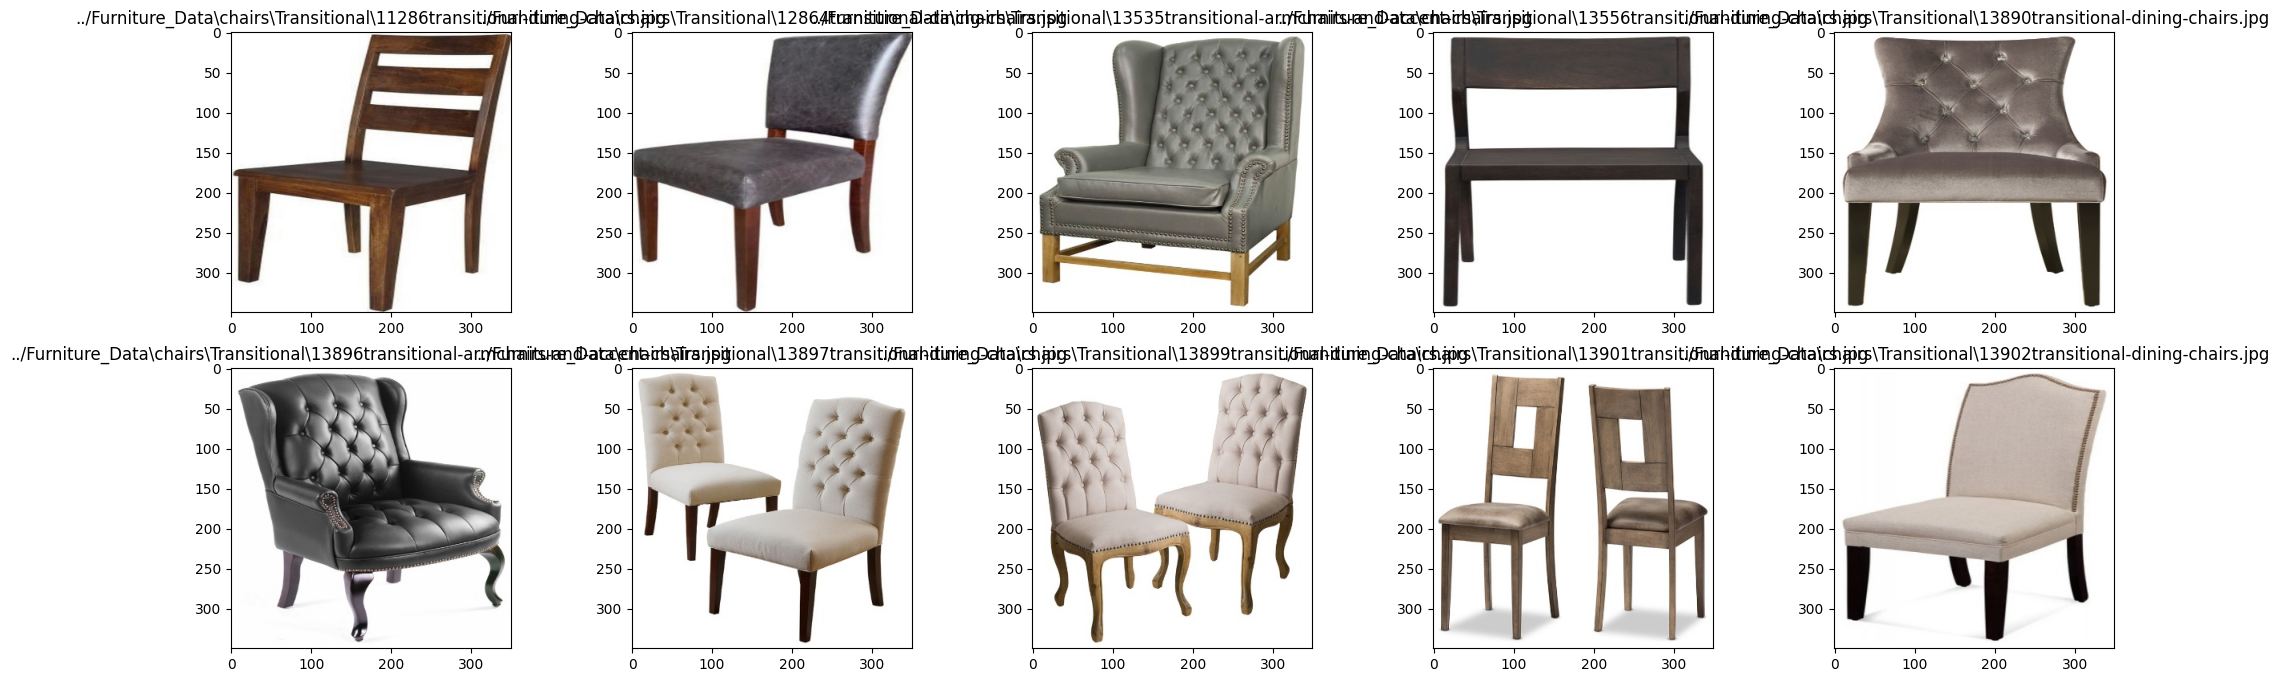

In [17]:
# Get indices of the top 10 most similar vectors
top_indices = np.argsort(similarity_scores.ravel())[::-1][:10]

# Get similarity scores corresponding to the top indices
top_similarity_scores = similarity_scores.ravel()[top_indices]

# Get paths of the top 10 most similar images
top_paths = types_predict_dataset.iloc[top_indices]

# Print the top 10 most similar images and their similarity scores
for path, score in zip(top_paths, top_similarity_scores):
    print("Image Path:", path)
    print("Similarity Score:", score)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(types_predict_dataset[i]))
    ax.set_title(types_predict_dataset[i])
plt.show()